In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:, 1:2].values
print((training_set))

[[ 325.25]
 [ 331.27]
 [ 329.83]
 ..., 
 [ 793.7 ]
 [ 783.33]
 [ 782.75]]


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set) 
print((training_set))

[[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 ..., 
 [ 0.95725128]
 [ 0.93796041]
 [ 0.93688146]]


In [32]:
x_train = training_set[0:(len(training_set)-1)]
y_train = training_set[1:(len(training_set))]
print(x_train)
print(y_train)

[[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 ..., 
 [ 0.95163331]
 [ 0.95725128]
 [ 0.93796041]]
[[ 0.09701243]
 [ 0.09433366]
 [ 0.09156187]
 ..., 
 [ 0.95725128]
 [ 0.93796041]
 [ 0.93688146]]


In [33]:
x_train = np.reshape(x_train, (1257, 1, 1))
#y_train = np.reshape(y_train, (1257, 1, 1))

In [34]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM

Using TensorFlow backend.


In [37]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
regressor.fit(x_train, y_train, batch_size = 32, nb_epoch = 210)

C:\Users\HP\Anaconda3\envs\workshop\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/210
1257/1257 [==============================] - 3s 3ms/step - loss: 1.0462
Epoch 2/210
1257/1257 [==============================] - 0s 158us/step - loss: 0.8492
Epoch 3/210
1257/1257 [==============================] - 0s 158us/step - loss: 0.6856
Epoch 4/210
1257/1257 [==============================] - 0s 182us/step - loss: 0.5514
Epoch 5/210
1257/1257 [==============================] - 0s 183us/step - loss: 0.4422
Epoch 6/210
1257/1257 [==============================] - 0s 158us/step - loss: 0.3537
Epoch 7/210
1257/1257 [==============================] - 0s 182us/step - loss: 0.2831
Epoch 8/210
1257/1257 [==============================] - 0s 169us/step - loss: 0.2272
Epoch 9/210
1257/1257 [==============================] - 0s 208us/step - loss: 0.1837
Epoch 10/210
1257/1257 [==============================] - 0s 198us/step - loss: 0.1505
Epoch 11/210
1257/1257 [==============================] - 0s 189us/step - loss: 0.1252
Epoch 12/210
1257/1257 [==============================

1257/1257 [==============================] - 0s 192us/step - loss: 0.0019
Epoch 96/210
1257/1257 [==============================] - 0s 185us/step - loss: 0.0017
Epoch 97/210
1257/1257 [==============================] - 0s 194us/step - loss: 0.0016
Epoch 98/210
1257/1257 [==============================] - 0s 189us/step - loss: 0.0014
Epoch 99/210
1257/1257 [==============================] - 0s 178us/step - loss: 0.0012
Epoch 100/210
1257/1257 [==============================] - 0s 167us/step - loss: 0.0011
Epoch 101/210
1257/1257 [==============================] - 0s 192us/step - loss: 9.9953e-04
Epoch 102/210
1257/1257 [==============================] - 0s 182us/step - loss: 8.9934e-04
Epoch 103/210
1257/1257 [==============================] - 0s 199us/step - loss: 8.1013e-04
Epoch 104/210
1257/1257 [==============================] - 0s 194us/step - loss: 7.3118e-04 0s - loss: 7.5563e- - ETA: 0s - loss: 7.6921e-
Epoch 105/210
1257/1257 [==============================] - 0s 186us/step - 

Epoch 184/210
1257/1257 [==============================] - 0s 159us/step - loss: 2.5138e-04
Epoch 185/210
1257/1257 [==============================] - 0s 180us/step - loss: 2.4979e-04
Epoch 186/210
1257/1257 [==============================] - 0s 189us/step - loss: 2.5098e-04
Epoch 187/210
1257/1257 [==============================] - 0s 189us/step - loss: 2.5093e-04
Epoch 188/210
1257/1257 [==============================] - 0s 174us/step - loss: 2.5429e-04
Epoch 189/210
1257/1257 [==============================] - 0s 181us/step - loss: 2.5144e-04
Epoch 190/210
1257/1257 [==============================] - 0s 163us/step - loss: 2.5091e-04
Epoch 191/210
1257/1257 [==============================] - 0s 191us/step - loss: 2.5272e-04
Epoch 192/210
1257/1257 [==============================] - 0s 181us/step - loss: 2.5381e-04
Epoch 193/210
1257/1257 [==============================] - 0s 193us/step - loss: 2.5201e-04
Epoch 194/210
1257/1257 [==============================] - 0s 185us/step - loss:

In [55]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values
#print((training_set))

In [56]:
inputs = real_stock_price
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

In [57]:
predictions = regressor.predict(inputs)
predictions = sc.inverse_transform(predictions)

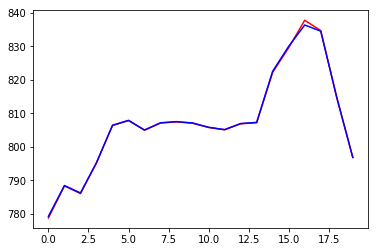

In [59]:

plt.plot(real_stock_price, color = 'red')
plt.plot(predictions, color = 'blue')
plt.show()
